In [2]:
import pandas as pd
import numpy as np


In [ ]:

# Simulated dataset
data = {
    "Yards": [1200, 800, 1500, 600, 900, 1100, 1400, 700],
    "TDs": [10, 6, 12, 4, 7, 9, 11, 5],
    "Age": [25, 28, 26, 30, 27, 24, 29, 31],
    "Receptions": [80, 50, 90, 40, 60, 75, 85, 45],
    "Contract_Value_Millions": [25.0, 8.0, 28.0, 5.0, 10.0, 18.0, 20.0, 6.0],
}

# Create a DataFrame
df = pd.DataFrame(data)
data = {
    # "name": [ "Justin Jefferson", "A.J. Brown", "CeeDee Lamb", "Tyreek Hill", "D.K. Metcalf", "Amon-Ra St.Brown", "Darius Slayton", "Jakobi Meyers", "Michael Pittman Jr.", "Davante Adams", "Nico Collins", "Calvin Ridley", "Jerry Jeudy", "Courtland Sutton", "DeAndre Hopkins", "Christian Kirk", "Jaylen Waddle", ],
    # "pos": [ "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr1", "wr2", "wr2", "wr2", ],
    # "season": [ 2024, 2023, 2023, 2023, 2023, 2023, 2023, 2022, 2023, 2024, 2023, 2023, 2022, 2019, 2024, 2021, 2023, ],
    # "games": [17, 17, 17, 16, 16, 16, 17, 14, 16, 14, 15, 17, 15, 16, 16, 17, 14],
    # "tgt": [ 154, 158, 152, 171, 119, 164, 79, 96, 156, 141, 109, 136, 100, 124, 80, 103, 104, ],
    "rec": [103, 106, 135, 119, 66, 119, 50, 67, 109, 85, 80, 76, 67, 72, 56, 77, 72],
    "yds": [
        1533,
        1456,
        1749,
        1799,
        1114,
        1515,
        770,
        804,
        1152,
        1063,
        1297,
        1016,
        972,
        1112,
        610,
        982,
        1014,
    ],
    # "y-r": [ 14.9, 13.7, 13.0, 15.1, 16.9, 12.7, 15.4, 12.0, 10.6, 12.5, 16.2, 13.4, 14.5, 15.4, 10.9, 12.8, 12.8, ],
    "td": [10, 7, 12, 13, 8, 12, 6, 6, 4, 8, 8, 8, 6, 6, 5, 5, 4],
    # "1d": [62, 70, 80, 83, 52, 75, 29, 38, 53, 49, 53, 49, 41, 50, 35, 44, 47],
    "succ": [
        57.1,
        56.3,
        63.5,
        57.9,
        51.3,
        61.3,
        49.4,
        54.7,
        51.9,
        46.8,
        61.5,
        48.5,
        52,
        49.2,
        60,
        60.2,
        58.7,
    ],
    "avg_sal": [35, 32, 34, 30, 33, 30, 11, 11, 23, 22, 24, 23, 17.5, 15, 5, 18, 28],
}


In [6]:
# df = pd.DataFrame(data)
df = pd.read_csv('./data/wideout_3yr_avg.csv')
# Features (X) and target (y)
X = df[["Age","Yds", "TD", "Y/Tgt", "Ctch%"]]
y = df["Avg_Sal"]

# Display the data to check
print("Dataset:")
print(df)

Dataset:
    Unnamed: 0             Player  Avg_Sal      G     GS     Tgt     Rec  \
0            0         A.J. Brown   32.000  15.67  15.33  133.33   87.00   
1            1       Adam Thielen    8.000  14.67  14.67  102.00   73.67   
2            2       Allen Lazard   11.000  13.50  12.50   80.00   48.50   
3            3       Amari Cooper   20.000  15.33  14.00  115.00   64.67   
4            4  Amon-Ra St. Brown   30.000  16.33  16.33  150.33  113.33   
..         ...                ...      ...    ...    ...     ...     ...   
74          74     Terry McLaurin   22.788  17.00  17.00  123.00   79.33   
75          75        Tutu Atwell   10.000  16.50   9.50   64.50   40.50   
76          76         Tyler Boyd    2.400  16.50  13.50   90.00   62.50   
77          77      Tyler Lockett   14.830  16.67  15.67  104.33   70.67   
78          78        Tyreek Hill   30.000  16.67  16.67  154.67  106.33   

        Yds    Y/R    TD     1D  Succ%    Lng   R/G    Y/G  Ctch%  Y/Tgt  \
0 

# Split the Data

In [7]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (63, 5)
Testing set size: (16, 5)


# Train the XGBoost Model

In [8]:
import xgboost as xgb

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(
    objective = 'reg:squarederror', # Minimize squared error for regression
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
    )

# Train the model
model.fit(X_train, y_train)

print("\nModel training complete.")


Model training complete.


# Make Predictions and Evaluate

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("\nTest Predictions:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.1f}M, Predicted: {pred:.1f}M")

print(f"\nMean Squared Error: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Test Predictions:
Actual: 13.0M, Predicted: 13.4M
Actual: 32.0M, Predicted: 30.9M
Actual: 22.0M, Predicted: 23.5M
Actual: 3.3M, Predicted: 2.0M
Actual: 33.0M, Predicted: 22.9M
Actual: 18.4M, Predicted: 7.8M
Actual: 22.0M, Predicted: 4.5M
Actual: 1.2M, Predicted: 2.8M
Actual: 30.0M, Predicted: 31.1M
Actual: 18.0M, Predicted: 21.4M
Actual: 13.3M, Predicted: 3.1M
Actual: 21.8M, Predicted: 29.9M
Actual: 6.4M, Predicted: 24.5M
Actual: 0.8M, Predicted: 3.3M
Actual: 1.2M, Predicted: 2.0M
Actual: 4.0M, Predicted: 4.1M

Mean Squared Error: 65.04
RMSE: 8.06
R² Score: 0.46


# Feature Importance

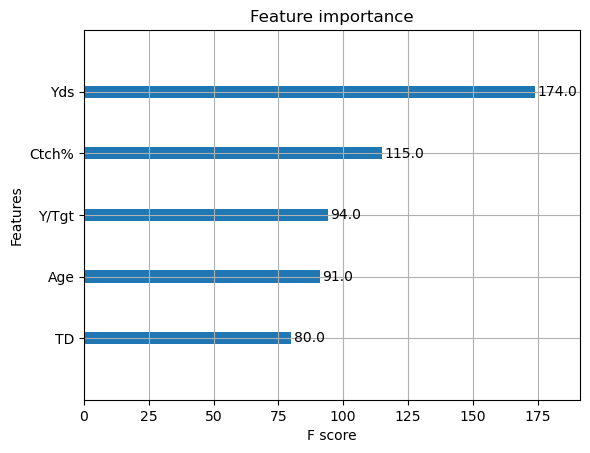

In [10]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(model)
plt.show()

# Predict a New Contract

In [16]:
# New WR data: [Yards, TDs, Age, Succ%]
new_player = np.array([[1000, 3, 29,61]])

# Predict contract value
predicted_contract = model.predict(new_player)
print(
    f"\nPredicted contract for 874 yards, 3 TDs, 29 years old, 61 Succ: ${predicted_contract[0]:.1f}M"
)


Predicted contract for 874 yards, 3 TDs, 29 years old, 61 Succ: $22.9M
